In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from functions import *
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [2]:
prev = pd.read_csv(r"C:\Users\oe\Desktop\HomeCreditDefaultRisk\data\previous_application.csv")

In [3]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
prev.loc[(prev["NAME_CONTRACT_STATUS"] == "Approved"),"NAME_CONTRACT_STATUS"] = 0
prev.loc[(prev["NAME_CONTRACT_STATUS"] == "Unused offer"),"NAME_CONTRACT_STATUS"] = 0
prev.loc[(prev["NAME_CONTRACT_STATUS"] == "Canceled"),"NAME_CONTRACT_STATUS"] = 1
prev.loc[(prev["NAME_CONTRACT_STATUS"] == "Refused"),"NAME_CONTRACT_STATUS"] = 1
prev["NAME_CONTRACT_STATUS"] = prev["NAME_CONTRACT_STATUS"].astype("int")

In [5]:
prev.shape

(1670214, 37)

In [6]:
missing_values_table(prev)

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


# Kategorik Değişken Analizi

In [7]:
cat_cols, num_cols, other_cols = cols(prev,"NAME_CONTRACT_STATUS",noc=10,ID=True)

Number of Categorical Columns: 13
['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_YIELD_GROUP', 'NFLAG_INSURED_ON_APPROVAL']
--------------------------------------------------
Number of Numerical Columns: 18
['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
--------------------------------------------------
['NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION']
--------------------------------------------------


CATEGORICAL FEATURE ANALYSIS

NAME_CONTRACT_TYPE : has 4 unique category 	- object

                    NAME_CONTRACT_TYPE    Count      Ratio  TARGET_MEAN
NAME_CONTRACT_TYPE                                                     
Cash loans                      747553  1670214  44.757917     0.581255
Consumer loans                  729151  1670214  43.656142     0.105251
Revolving loans                 193164  1670214  11.565225     0.493819
XNA                                346  1670214   0.020716     1.000000




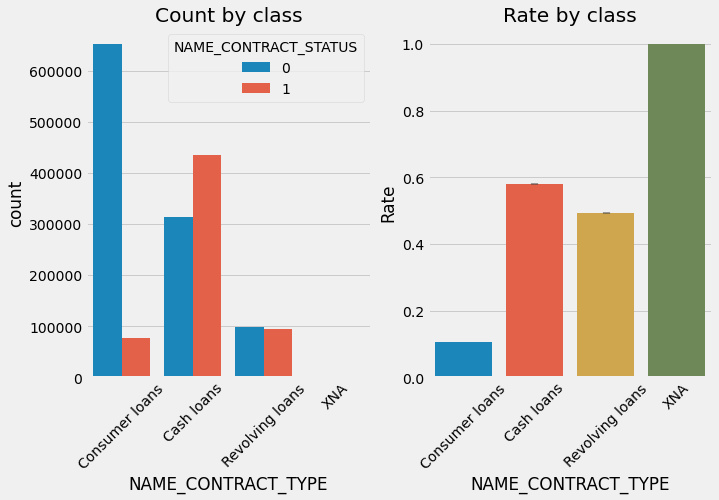




WEEKDAY_APPR_PROCESS_START : has 7 unique category 	- object

           WEEKDAY_APPR_PROCESS_START    Count      Ratio  TARGET_MEAN
FRIDAY                         252048  1670214  15.090761     0.377579
MONDAY                         253557  1670214  15.181109     0.395386
SATURDAY                       240631  1670214  14.407196     0.304213
SUNDAY                         164751  1670214   9.864065     0.257777
THURSDAY                       249099  1670214  14.914197     0.386112
TUESDAY                        255118  1670214  15.274570     0.393496
WEDNESDAY                      255010  1670214  15.268103     0.389538




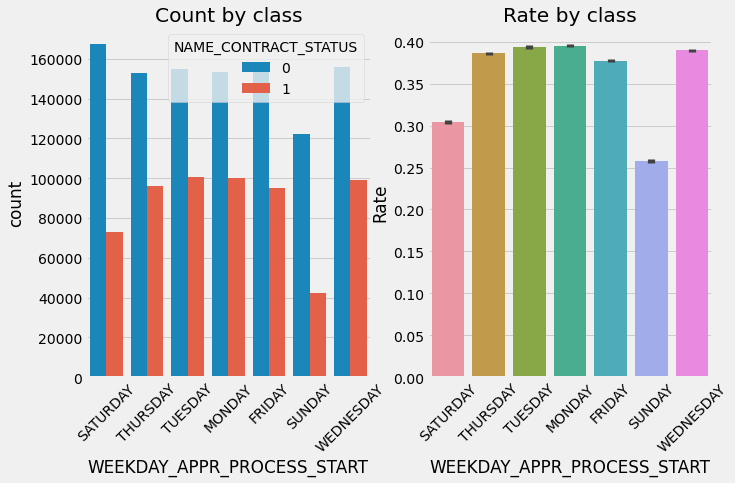




FLAG_LAST_APPL_PER_CONTRACT : has 2 unique category 	- object

   FLAG_LAST_APPL_PER_CONTRACT    Count     Ratio  TARGET_MEAN
N                         8475  1670214   0.50742     1.000000
Y                      1661739  1670214  99.49258     0.360178




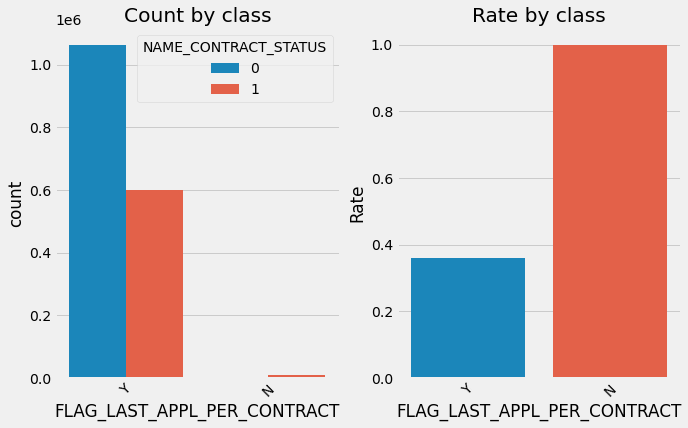




NFLAG_LAST_APPL_IN_DAY : has 2 unique category 	- int64

   NFLAG_LAST_APPL_IN_DAY    Count      Ratio  TARGET_MEAN
0                    5900  1670214   0.353248     0.872881
1                 1664314  1670214  99.646752     0.361619




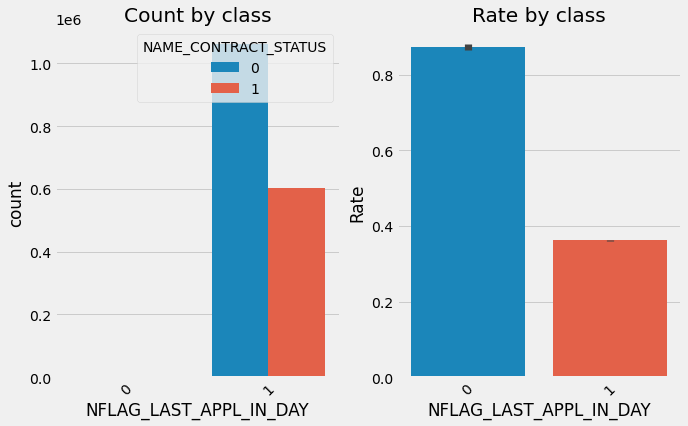




NAME_PAYMENT_TYPE : has 4 unique category 	- object

                                           NAME_PAYMENT_TYPE    Count  \
Cash through the bank                                1033552  1670214   
Cashless from the account of the employer               1085  1670214   
Non-cash from your account                              8193  1670214   
XNA                                                   627384  1670214   

                                               Ratio  TARGET_MEAN  
Cash through the bank                      61.881412     0.184313  
Cashless from the account of the employer   0.064962     0.198157  
Non-cash from your account                  0.490536     0.149152  
XNA                                        37.563091     0.661577  




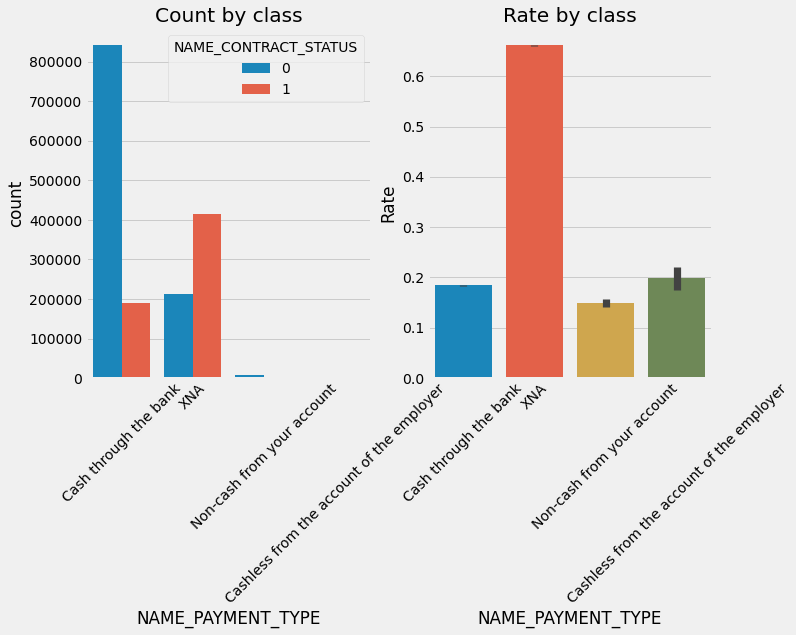




CODE_REJECT_REASON : has 9 unique category 	- object

        CODE_REJECT_REASON    Count      Ratio  TARGET_MEAN
CLIENT               26436  1670214   1.582791     0.000000
HC                  175231  1670214  10.491530     1.000000
LIMIT                55680  1670214   3.333705     1.000000
SCO                  37467  1670214   2.243245     1.000000
SCOFR                12811  1670214   0.767027     1.000000
SYSTEM                 717  1670214   0.042929     1.000000
VERIF                 3535  1670214   0.211650     1.000000
XAP                1353093  1670214  81.013152     0.233776
XNA                   5244  1670214   0.313972     0.998474




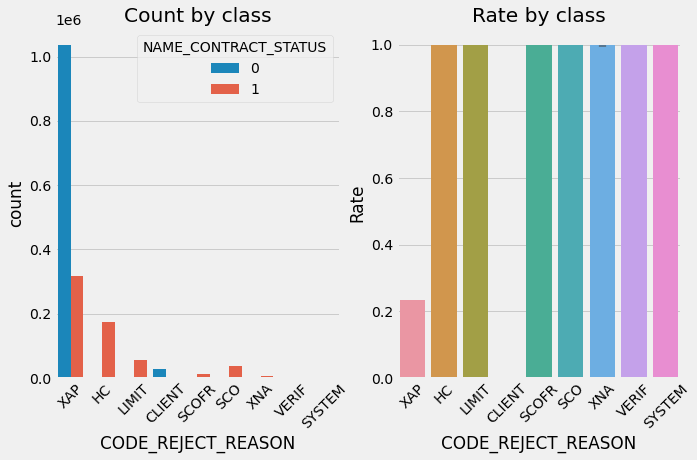




NAME_TYPE_SUITE : has 7 unique category 	- object

                 NAME_TYPE_SUITE    Count      Ratio  TARGET_MEAN
NaN                       820405  1670214        NaN          NaN
Unaccompanied             508970  1670214  30.473341     0.252675
Family                    213263  1670214  12.768603     0.155859
Spouse, partner            67069  1670214   4.015593     0.139081
Children                   31566  1670214   1.889937     0.130013
Other_B                    17624  1670214   1.055194     0.154335
Other_A                     9077  1670214   0.543463     0.153795
Group of people             2240  1670214   0.134115     0.214732




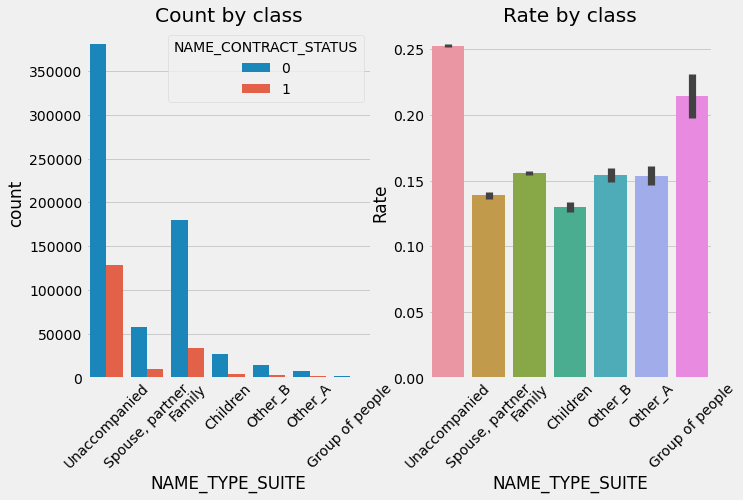




NAME_CLIENT_TYPE : has 4 unique category 	- object

           NAME_CLIENT_TYPE    Count      Ratio  TARGET_MEAN
New                  301363  1670214  18.043376     0.059659
Refreshed            135649  1670214   8.121654     0.255041
Repeater            1231261  1670214  73.718757     0.449208
XNA                    1941  1670214   0.116213     0.685214




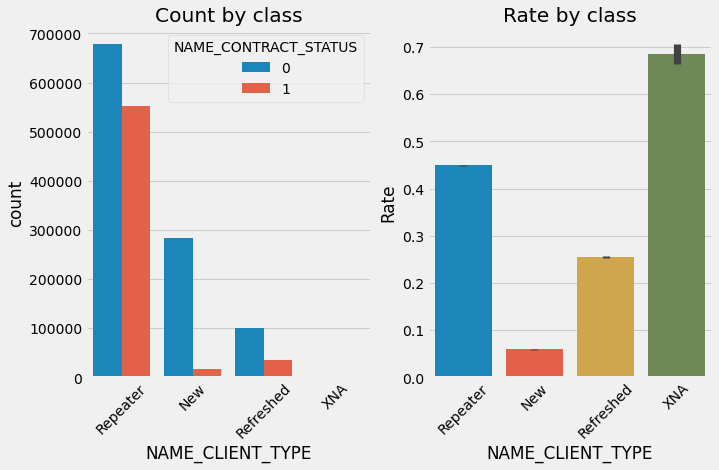




NAME_PORTFOLIO : has 5 unique category 	- object

       NAME_PORTFOLIO    Count      Ratio  TARGET_MEAN
Cards          144985  1670214   8.680624     0.325634
Cars              425  1670214   0.025446     0.381176
Cash           461563  1670214  27.634962     0.322875
POS            691011  1670214  41.372603     0.092465
XNA            372230  1670214  22.286366     0.931419




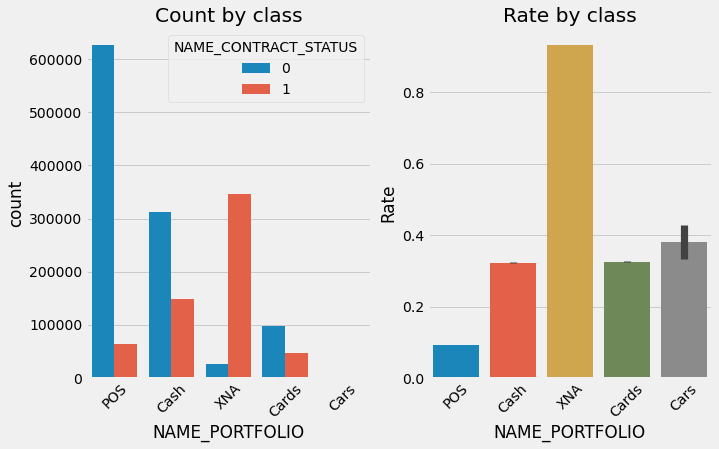




NAME_PRODUCT_TYPE : has 3 unique category 	- object

         NAME_PRODUCT_TYPE    Count      Ratio  TARGET_MEAN
XNA                1063666  1670214  63.684414     0.386172
walk-in             150261  1670214   8.996512     0.516455
x-sell              456287  1670214  27.319074     0.260003




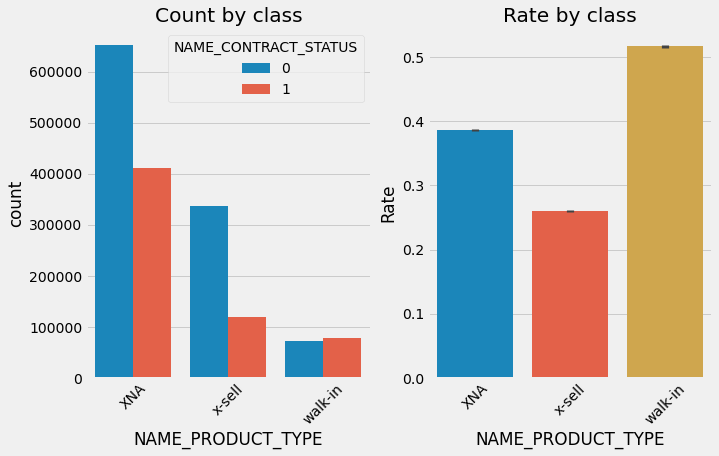




CHANNEL_TYPE : has 8 unique category 	- object

                            CHANNEL_TYPE    Count      Ratio  TARGET_MEAN
AP+ (Cash loan)                    57046  1670214   3.415490     0.452442
Car dealer                           452  1670214   0.027062     0.367257
Channel of corporate sales          6150  1670214   0.368216     0.569268
Contact center                     71297  1670214   4.268734     0.646268
Country-wide                      494690  1670214  29.618360     0.136538
Credit and cash offices           719968  1670214  43.106332     0.597836
Regional / Local                  108528  1670214   6.497850     0.105236
Stone                             212083  1670214  12.697954     0.103992




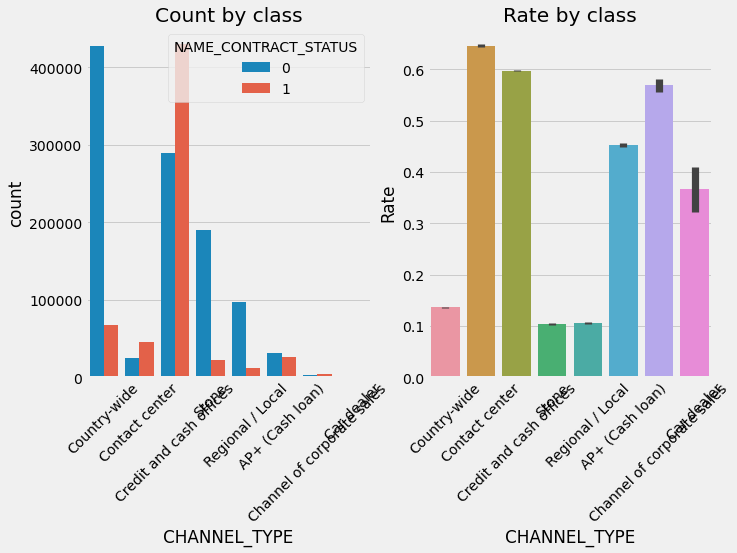




NAME_YIELD_GROUP : has 5 unique category 	- object

            NAME_YIELD_GROUP    Count      Ratio  TARGET_MEAN
XNA                   517215  1670214  30.966990     0.761606
high                  353331  1670214  21.154834     0.153513
low_action             92041  1670214   5.510731     0.229952
low_normal            322095  1670214  19.284655     0.233987
middle                385532  1670214  23.082791     0.161623




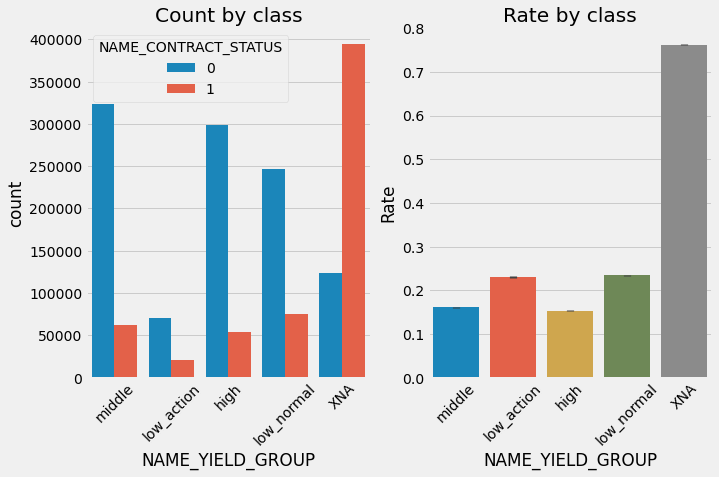




NFLAG_INSURED_ON_APPROVAL : has 2 unique category 	- float64

     NFLAG_INSURED_ON_APPROVAL    Count     Ratio  TARGET_MEAN
0.0                     665527  1670214  39.84681          0.0
1.0                     331622  1670214  19.85506          0.0
NaN                     673065  1670214       NaN          NaN




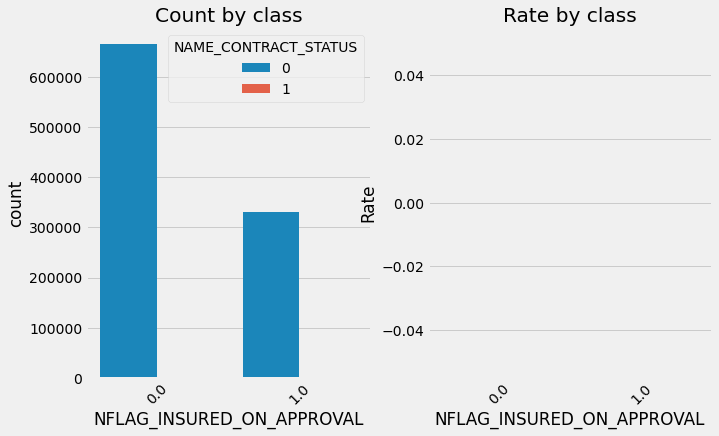




13 categorical variables have been described

There are 0 variables have more than 10 classes

Variable names have more than 10 classes:

[]


In [8]:
cat_summary(prev,cat_cols,"NAME_CONTRACT_STATUS",noc=10)

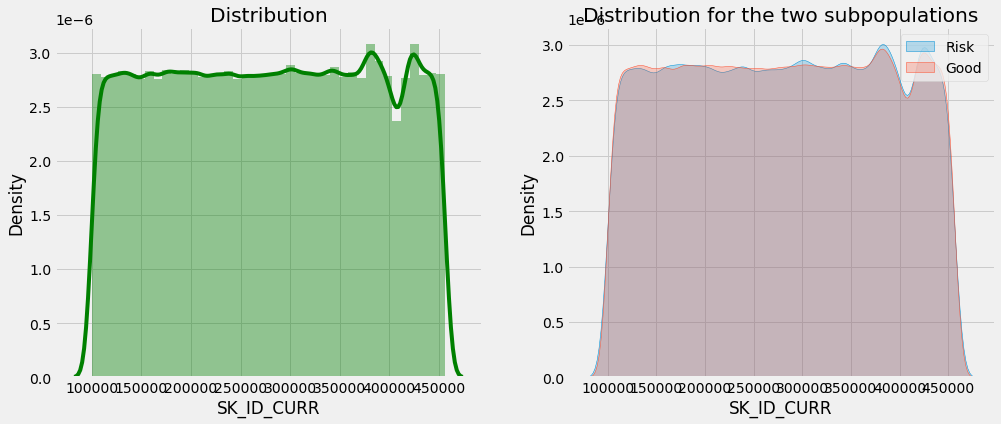

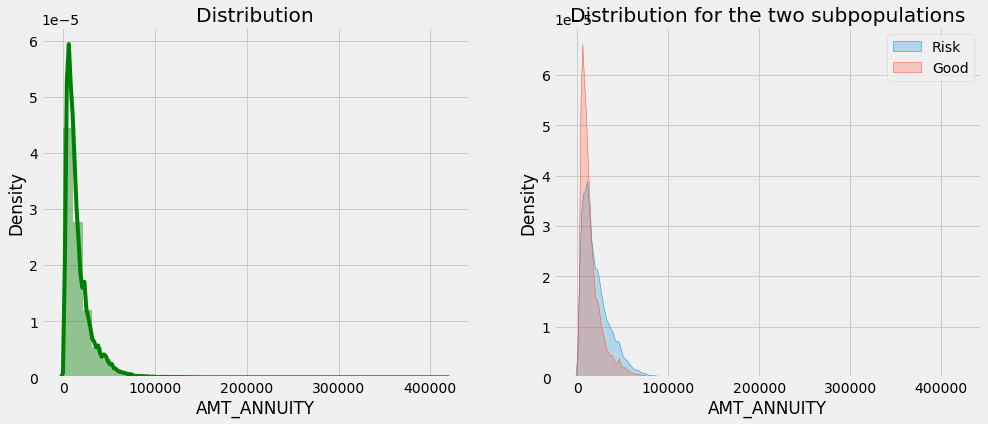

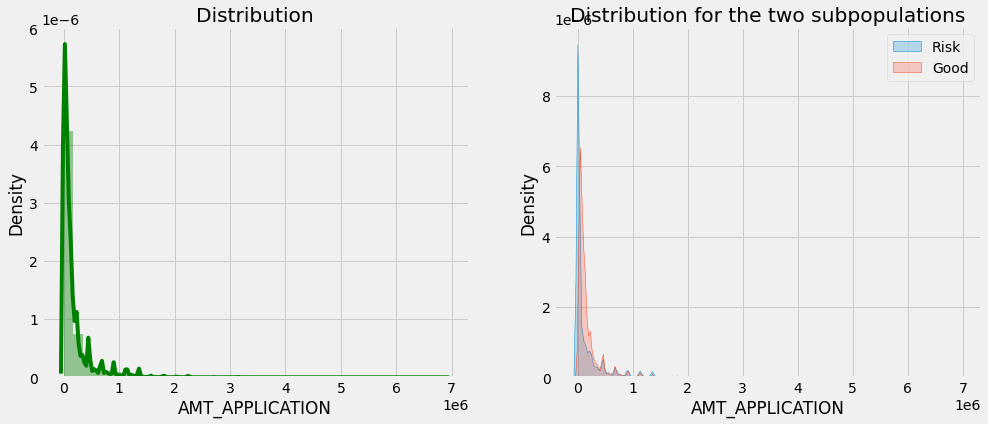

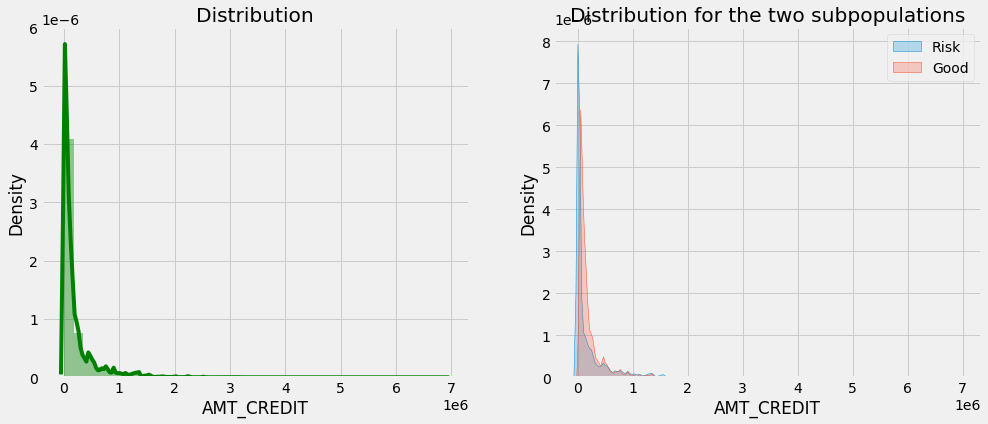

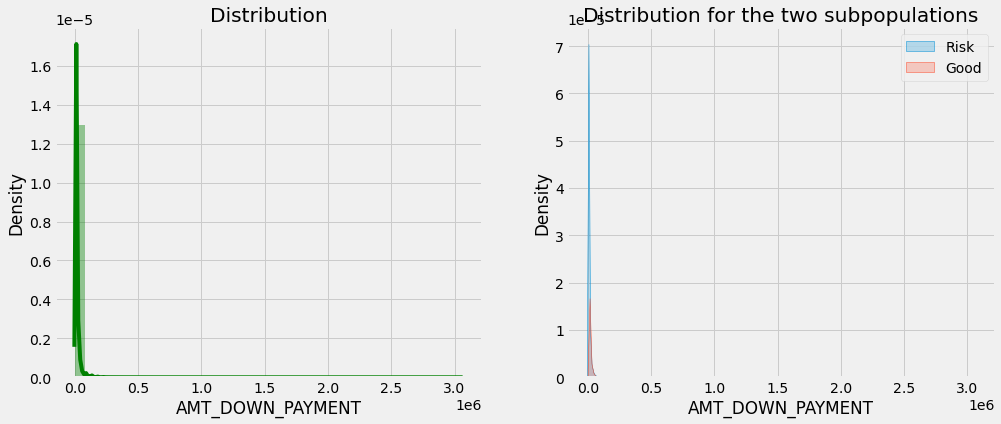

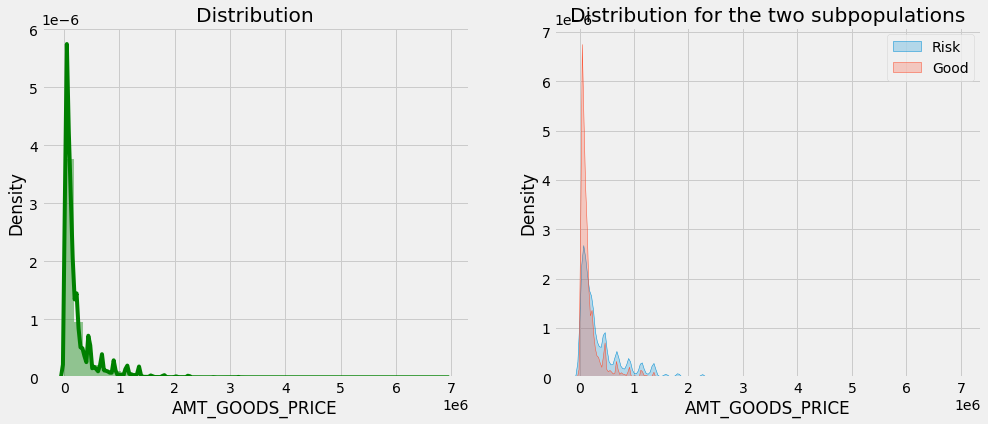

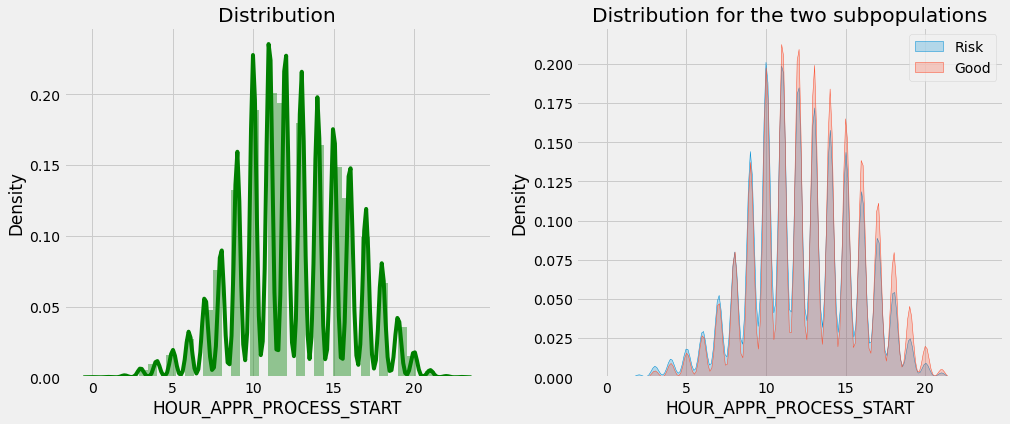

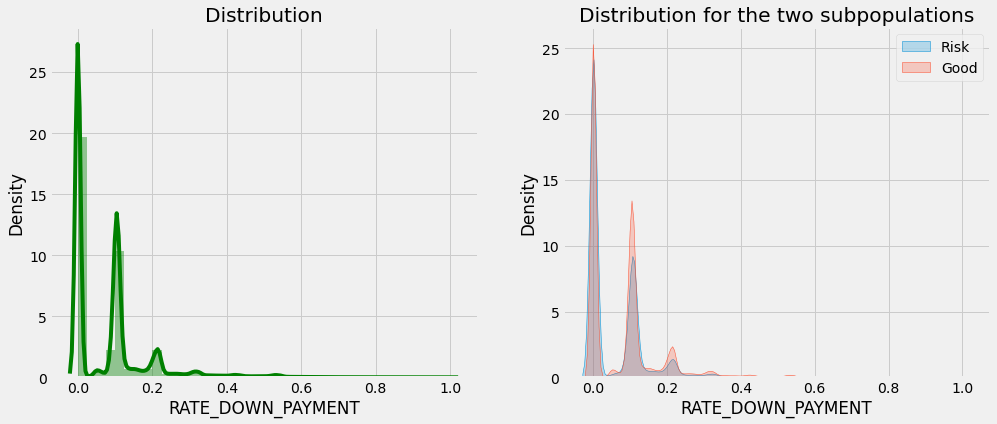

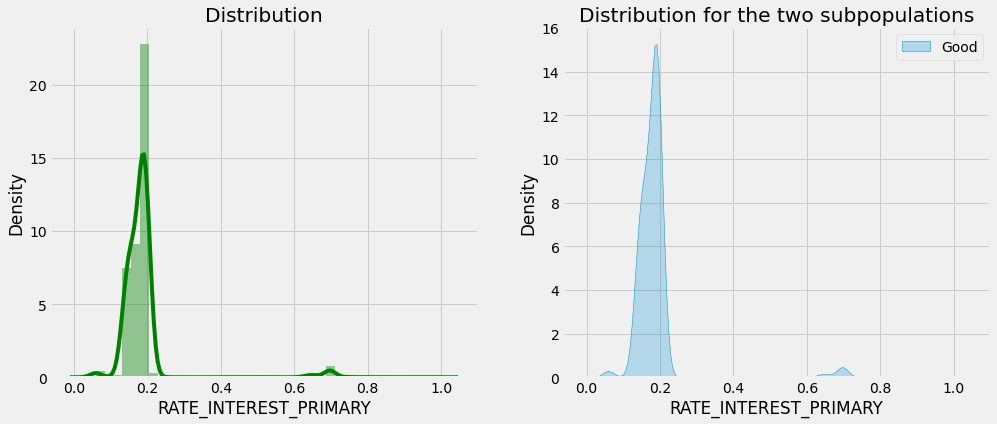

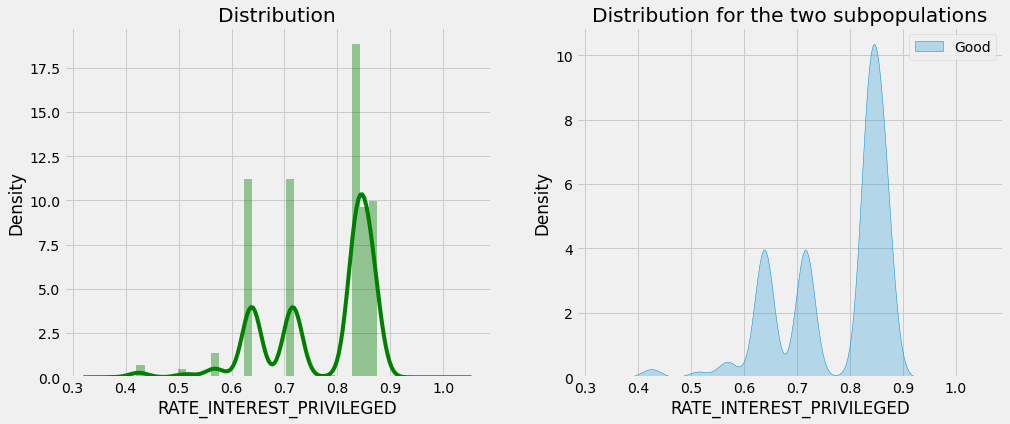

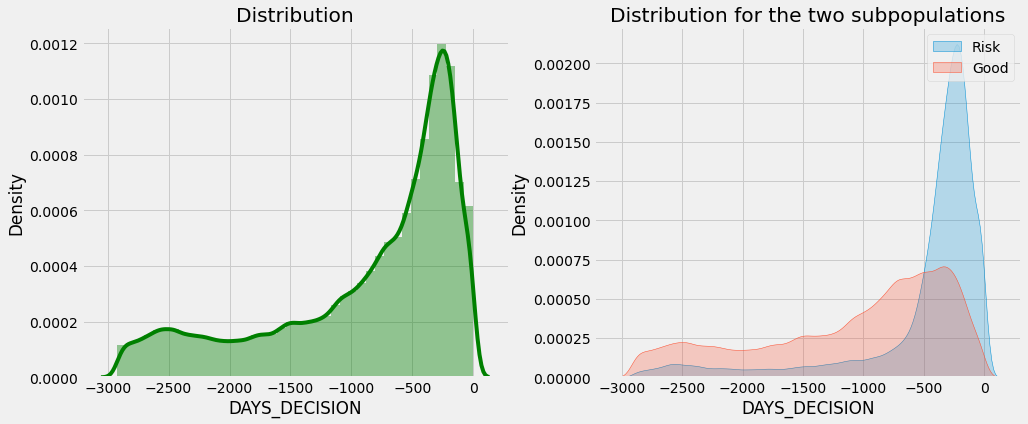

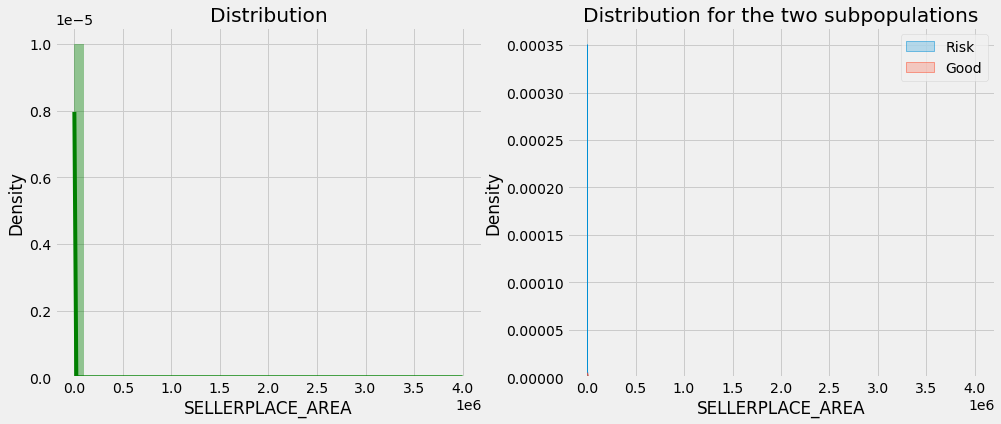

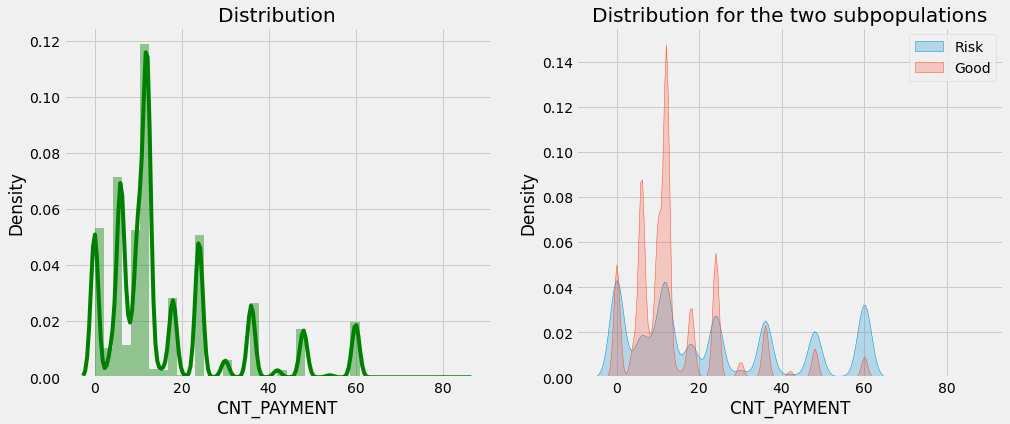

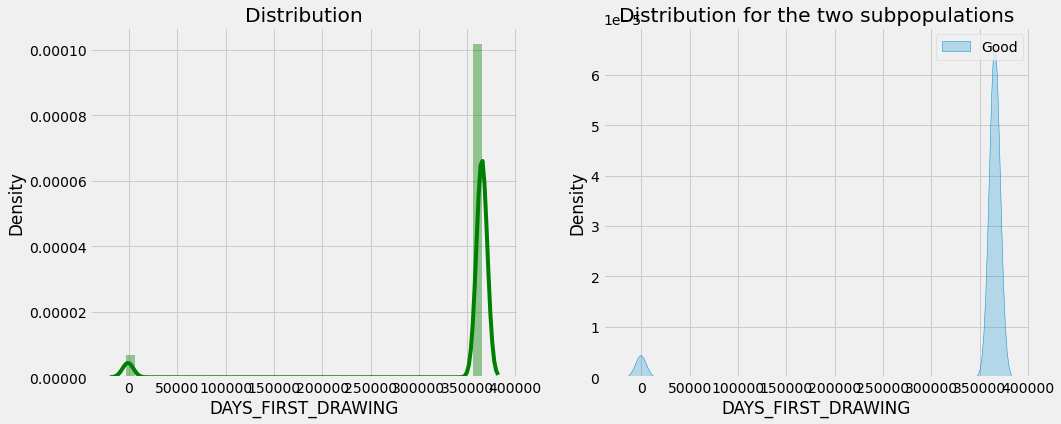

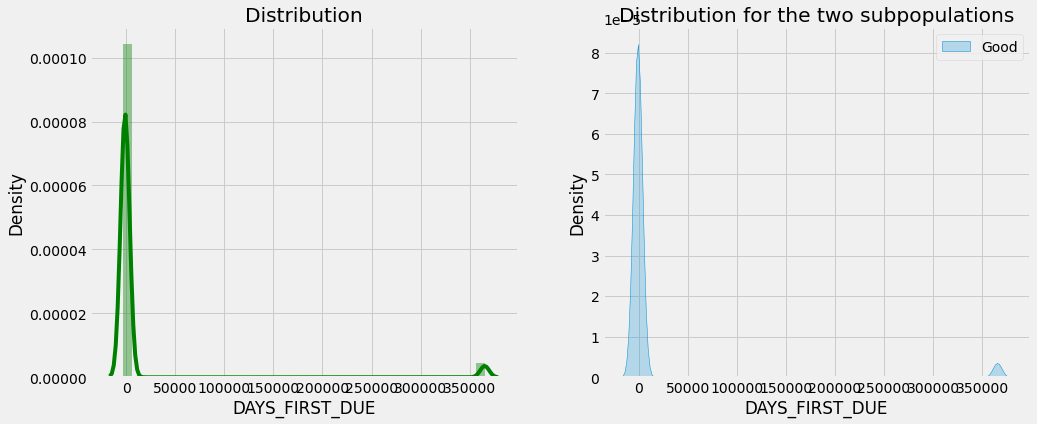

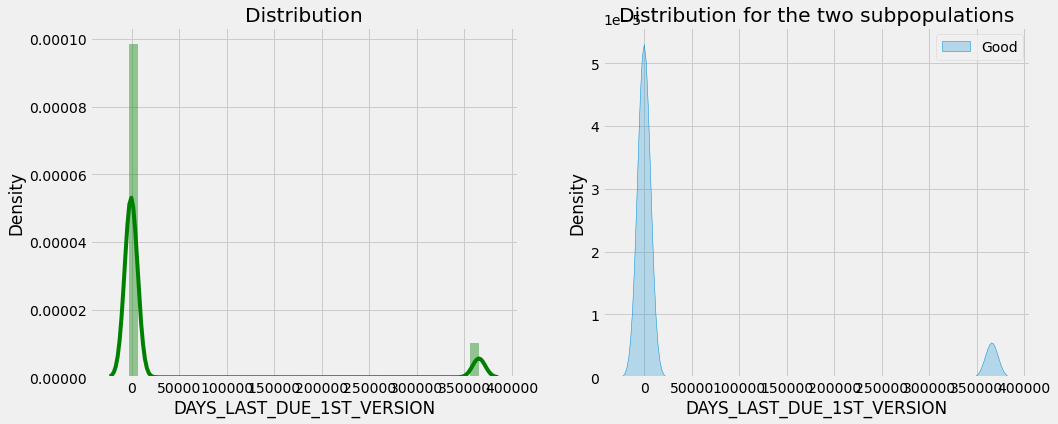

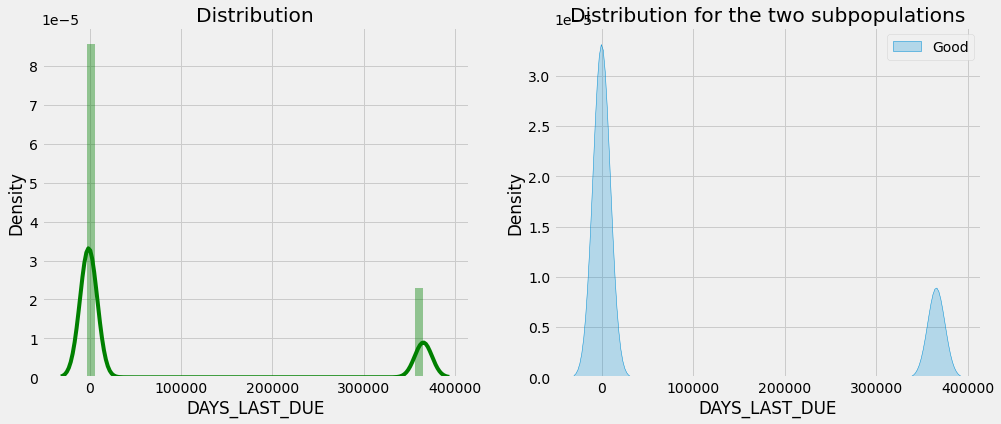

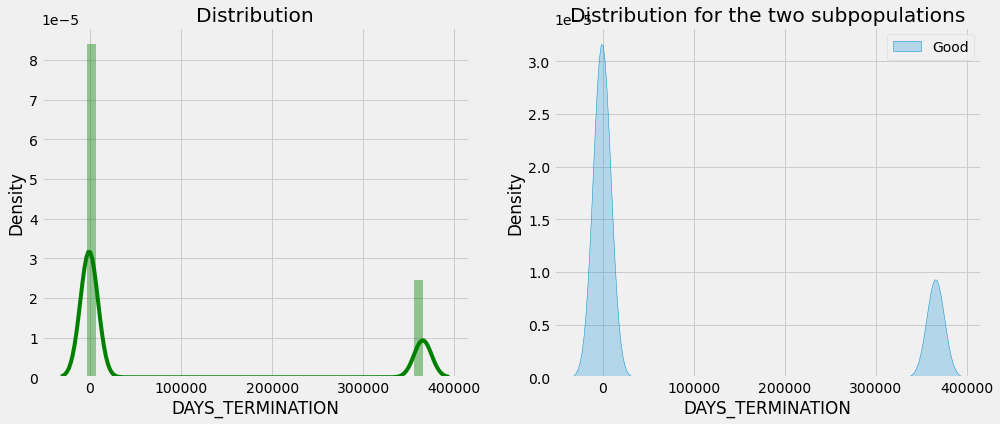

In [12]:
num_summary(prev,num_cols,"NAME_CONTRACT_STATUS")